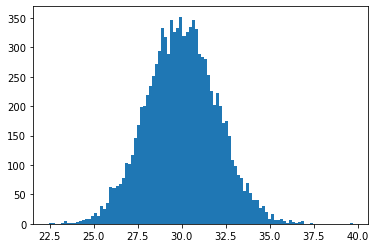

(30.00833286866176, 2.005079216950665)


In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

μ = 30  # 数学期望
o = 2  # 方差
x = μ + o * np.random.randn(10000)  # 正态分布
plt.hist(x, bins=100)  # 直方图显示
plt.show()
print(norm.fit(x))  # 返回极大似然估计，估计出参数约为30和2

In [4]:
import numpy as np
import sympy

data = [0, 0, 1, 1, 0, 1]
l = len(data)
X = []
p = sympy.symbols('p', positive=True)  #将p符号化
for i in range(0, l):
    k = data[i]
    f = (p**k) * ((1 - p)**(1 - k))  #分布律或密度函数
    X.append(f)  #X的元素为f(x1), f(x2) ,……,f(xn)。
L = np.prod(
    [X])  #似然函数， np.prod()函数用来计算所有元素的乘积，对于有多个维度的数组可以指定轴，如axis=1指定计算每一行的乘积。
print('似然函数为', L)
lnL = sympy.expand_log(sympy.log(L))  #取对数
print('对数似然函数为', lnL)
diff = sympy.diff(lnL, p)
print('微分方程为', diff)
solve = sympy.solve(diff)  #solve()函数解方程,利用diff()函数计算微分
#diff(func,var,n):高阶微分
print('解为', solve, '均值为', np.mean(data))


似然函数为 p**3*(1 - p)**3
对数似然函数为 3*log(p) + log((1 - p)**3)
微分方程为 -3/(1 - p) + 3/p
解为 [1/2] 均值为 0.5


In [5]:
import sympy
import numpy as np

μ, σ = sympy.Symbol('a'), sympy.Symbol('b')
x = [1, 2, 2, 1, 5, 1]
y = []
for i in range(0, len(x)):
    k = x[i]
    f = 1 / (σ * np.sqrt(2 * np.pi)) * np.e**(-(k - μ)**2 / (2 * σ**2))  #密度函数
    y.append(f)
L = np.prod(y)  #似然函数
lnL = sympy.expand_log(sympy.log(L))  #取对数
dlnL1 = sympy.diff(lnL, μ)  #求导
dlnL2 = sympy.diff(lnL, σ)
print('μ,σ的极大似然估计：', sympy.solve([dlnL1, dlnL2], [μ, σ]))


μ,σ的极大似然估计： [(2.00000000000000, -1.41421356237310), (2.00000000000000, 1.41421356237310)]


In [6]:
import numpy as np
import sympy

data = [1, 2, 4, 2, 3, 5, 6, 8]
l = len(data)
X = []
y = []


def jie(i):
    if i == 1:
        k = i
    else:
        k = i * jie(i - 1)
    return k


p = sympy.symbols('p', positive=True)  #将p符号化
for i in data:
    k = jie(20) / (jie(20 - i) * jie(i))
    s = k * p**i * (1 - p)**(20 - i)
    y.append(s)

L = np.prod(y)  # 极大似然函数
print('似然函数为', L)
lnL = sympy.expand_log(sympy.log(L))  #取对数
print('对数似然函数为', lnL)
diff = sympy.diff(lnL, p)
print('微分方程为', diff)
solve = sympy.solve(diff)  #solve()函数解方程,利用diff()函数计算微分
#diff(func,var,n):高阶微分
print('解为', solve, '均值为', np.mean(data))


似然函数为 3.01877321369123e+26*p**31*(1 - p)**129
对数似然函数为 31*log(p) + log((1 - p)**129) + 60.97206294607
微分方程为 -129/(1 - p) + 31/p
解为 [31/160] 均值为 3.875


In [7]:
import sympy
import numpy as np
data = [1, 2, 2, 1, 5, 1]
mu = sympy.symbols('mu')  #将μ符号化
sigma = sympy.symbols('sigma', positive=True)  #将σ符号化
pai = np.pi
l = len(data)
X = []
for i in range(0, l):
    k = data[i]
    f = (1 / (np.sqrt(2 * pai) * sigma)) * np.e**(
        (-(k - mu)**2) / (2 * sigma**2))  #密度函数
    X.append(f)
#print(X)
L = np.prod(
    X
)  #似然函数,np.prod()函数用来计算所有元素的乘积，对于有多个维度的数组可以指定轴，如axis=1指定计算每一行的乘积。变量替换subs函数，用i替换x
#print(L)
lnL = sympy.expand_log(sympy.log(L))  #取对数
#print(lnL)
diff1 = sympy.diff(lnL, mu)  #对μ求偏导
#print(diff1)

diff2 = sympy.diff(lnL, sigma)
#print(diff2)
solve1 = sympy.solve([diff1, diff2], [mu, sigma])
print('方程的解为', solve1)


方程的解为 [(2.00000000000000, 1.41421356237310)]


In [8]:
import sympy

data = [1, 2, 2, 2, 4, 3]
a, b = sympy.symbols("a b")  #将μ符号化
l = len(data)
X = []
for i in range(0, l):
    k = data[i]
    f = 1 / (b - a)  #密度函数
    X.append(f)
#print(X)
L = np.prod(
    X
)  #似然函数,np.prod()函数用来计算所有元素的乘积，对于有多个维度的数组可以指定轴，如axis=1指定计算每一行的乘积。变量替换subs函数，用i替换x
print(L)
lnL = sympy.expand_log(sympy.log(L))  #取对数
print(lnL)
diff1 = sympy.diff(lnL, a)  #对μ求偏导
print(diff1)

diff2 = sympy.diff(lnL, b)
print(diff2)
solve1 = sympy.solve([diff1, diff2], [a, b])
print('方程的解为', solve1)
b = np.max(data)
a = np.min(data)
print("极大似然估计为:", a, b)


(-a + b)**(-6)
log((-a + b)**(-6))
6/(-a + b)
-6/(-a + b)
方程的解为 []
极大似然估计为: 1 4
